In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random 
np.random.seed(42)
data = pd.read_csv(r"C:\Users\ivana\Downloads\Ksenobiotici_makroinvertebrate.csv",encoding='latin-1')

In [2]:
data


,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
0,NaN,Chironomidae,Chironomidae,Chironomidae,Chironomidae,Chironomidae,Chironomidae,Chironomidae,Chironomidae,Chironomidae,...,Odonata,Odonata,Diptera,2.4 D,Chloroxuron,Bromacil,Dimefuron,Amoxicillin,Bentazon,Fluoranthene
1,JDS lokalitet,"Chironomus acutiventris / obtusidens Wuelker, ...",Chironomus annularis gr.,"Chironomus bernensis Kloetzli, 1973","Chironomus nudiventris Ryser, Scholl & Wuelker...","Chironomus cf. obtusidens Goetghebuer, 1921","Chironomus plumosus gr. Linnaeus, 1758","Cladotanytarsus conversus Johannsen, 1932",Cladotanytarsus spp.,"Cricotopus bicinctus Meigen, 1818",...,"Gomphus flavipes Charpentier, 1825","Gomphus vulgatissimus Linnaeus, 1758",Ceratopogonidae Gen. sp.,2.4 D,Chloroxuron,Bromacil,Dimefuron,Amoxicillin,Bentazon,Fluoranthene
2,JDS3 R,0,0,0,0,0,0,0,0,3,...,0,0,0,0.003404762,0.0113,0.083832,0.0096127,0.0354136,0.003,0.0047
3,JDS3 L,0,0,0,1,0,0,0,1,2,...,0,0,0,0.003404762,0.0113,0.083832,0.0096127,0.0354136,0.003,0.0047
4,JDS4 R,0,0,0,1,0,0,0,4,7,...,0,1,0,0.002109524,0.0113,0.083832,0.0096127,0.0354136,0.005,0.0024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,JDS66 L,0,0,0,0,0,0,0,0,0,...,0,0,0,0.003961905,0.0057,0.0298303,0.0076381,0,0.007,0.0025
104,JDS67 R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0062,0,0.0100676,0,0.007,0.002
105,JDS67 L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.0062,0,0.0100676,0,0.007,0.002
106,JDS68 R,0,0,0,0,0,0,0,0,0,...,0,0,0,0.001342857,0.006,0.0317049,0.0080932,0,0.008,0.0025


In [3]:

X = data.iloc[2:,[73,69,68,70,72,58,60,91]].values  
y = data.iloc[2:,166].values 
X=X.astype("float32")
y=y.astype("float32")

In [4]:
X


array([[  0.,   0.,   0.,   0.,   0.,  66.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  27.,   0.,   0.],
       [  5.,  31.,  16.,  52.,   0.,  97.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.],
       [  0.,   0.,   0.,  53.,   0.,  35.,   0.,   0.],
       [  0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  1.,  11.,   0.,   1.,   0.,   6.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  85.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 372.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0., 142.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   7.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,

In [5]:

X.shape

(106, 8)

In [6]:
print (y)
y.shape

[0.083832  0.083832  0.083832  0.083832  0.0302266 0.0302266 0.0826422
 0.0826422 0.084234  0.084234  0.0569165 0.0569165 0.0649531 0.0649531
 0.        0.        0.        0.        0.        0.        0.0437019
 0.0437019 0.        0.        0.0302276 0.0302276 0.186626  0.186626
 0.0773327 0.0773327 0.0294399 0.0294399 0.0681038 0.0681038 0.0439631
 0.0439631 0.0483794 0.0483794 0.        0.        0.        0.
 0.        0.        0.0669014 0.0669014 0.        0.        0.0392966
 0.0392966 0.        0.        0.        0.        0.0773376 0.0773376
 0.1062102 0.1062102 0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.0236898 0.0236898 0.        0.        0.        0.        0.0335525
 0.0335525 0.        0.        0.0231236 0.0231236 0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.0298303 0.0298303 0.      

(106,)

In [7]:
len(y)


106

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=10, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array or a pandas DataFrame named 'data' that you want to scale
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(X_train)

# Transform the data using the scaler
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
#train_index=np.arange(0, X.shape[0])#train index svi indeksi
#test_index= np.random.randint(0, X.shape[0],10)#nasumice uzima 10 za test
#train_index=np.setdiff1d(train_index, test_index)#novi train indeks bez testa
#X_train=X[train_index,:]#sve vrednosti iz train seta
#X_test=X[test_index,:]
#y_train=y[train_index]
#y_test=y[test_index]

In [11]:
X.shape[1]


8

Epoch 1/200
76/76 [==============================] - 1s 4ms/step - loss: 0.0516 - val_loss: 0.0017
Epoch 2/200
76/76 [==============================] - 0s 889us/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/200
76/76 [==============================] - 0s 863us/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/200
76/76 [==============================] - 0s 877us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/200
76/76 [==============================] - 0s 870us/step - loss: 0.0018 - val_loss: 0.0013
Epoch 6/200
76/76 [==============================] - 0s 872us/step - loss: 0.0017 - val_loss: 0.0012
Epoch 7/200
76/76 [==============================] - 0s 879us/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/200
76/76 [==============================] - 0s 869us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/200
76/76 [==============================] - 0s 857us/step - loss: 0.0017 - val_loss: 0.0011
Epoch 10/200
76/76 [==============================] - 0s 899us/step - loss: 0.0017 - val_loss

Epoch 160/200
76/76 [==============================] - 0s 875us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 161/200
76/76 [==============================] - 0s 861us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 162/200
76/76 [==============================] - 0s 878us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 163/200
76/76 [==============================] - 0s 858us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 164/200
76/76 [==============================] - 0s 871us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 165/200
76/76 [==============================] - 0s 877us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 166/200
76/76 [==============================] - 0s 873us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 167/200
76/76 [==============================] - 0s 852us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 168/200
76/76 [==============================] - 0s 885us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 169/200
76/76 [==============================] - 0s 889us/step - lo

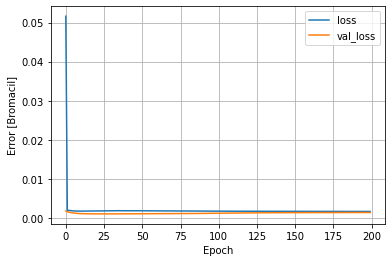

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# define the model
model = Sequential()

#model.add(Dense(8, activation='sigmoid'))
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='linear'))


tf.random.set_seed(12345)
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001))
#learning rate 0.001

history=model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1,shuffle=False, validation_split=0.2)

hist = pd.DataFrame(history.history)#beleži obuku po epohama
hist['epoch'] = history.epoch

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Error [Bromacil]')
plt.legend()
plt.grid(True)

In [13]:
history=model.evaluate(X_test, y_test, batch_size=1, verbose=0)
history


0.0007801266037859023

In [14]:
X_test



array([[-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.5085385 ,  0.01454626, -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.5085385 , -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.27640918, -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.5085385 , -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.5085385 , -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.43599808, -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
        -0.01526371, -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771, -0.1554926 , -0.19873525,  0.8823414 ,
        -0.16034453, -0.2647419 , -0.12565617],
       [-0.164577  , -0.12847771

In [15]:
#test_index

In [16]:
X[73,:]

array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.], dtype=float32)

In [17]:
y_predict=model.predict(X_test)

y_predict

1/1 [==============================] - 0s 81ms/step


array([[0.01578055],
       [0.01791451],
       [0.01898957],
       [0.01791451],
       [0.01791451],
       [0.01827471],
       [0.01998229],
       [0.01028606],
       [0.01791451],
       [0.01791451]], dtype=float32)

In [18]:
y_test

array([0.0298303, 0.0569165, 0.0302266, 0.0231236, 0.       , 0.       ,
       0.0294399, 0.0681038, 0.       , 0.0569165], dtype=float32)

In [19]:
y_predict=model.evaluate(X_test,y_test)

y_predict #ukupna greška(MSE)za ceo test skup 

1/1 [==============================] - 0s 69ms/step - loss: 7.8013e-04


0.0007801264291629195

In [20]:
X_test[1]

array([-0.164577  , -0.12847771, -0.1554926 , -0.19873525, -0.10259783,
       -0.5085385 , -0.2647419 , -0.12565617], dtype=float32)

In [21]:
history

0.0007801266037859023

In [22]:
y_test

array([0.0298303, 0.0569165, 0.0302266, 0.0231236, 0.       , 0.       ,
       0.0294399, 0.0681038, 0.       , 0.0569165], dtype=float32)

In [23]:
# predict output on test set
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 13ms/step


In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error (y_test, y_pred)
mae = np.mean(np.abs(y_test - y_predict))
print("Mean Absolute Error:", mae)
from sklearn.metrics import mean_squared_error

# assume model and test set data are already defined
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)
# calculate MSE
mse = mean_squared_error(y_test, y_pred)

# print the result
print("MSE:", mse)

Mean Absolute Error: 0.02914367
R2 Score: -0.3818293930852208
MSE: 0.00078012724
